In [1]:
from flair.embeddings import WordEmbeddings
from flair.data import Sentence

c:\program files\python\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
sentence = Sentence('Monica is sister Ross grandfather grandmother mother father brother son daughter wife husband grandchild \
                    grandson granddaughter nephew niece uncle aunt parent child grandparent friend')


In [3]:
glove_embedding = WordEmbeddings('glove')

In [4]:
glove_embedding.embed(sentence)

[Sentence: "Monica is sister Ross grandfather grandmother mother father brother son daughter wife husband grandchild grandson granddaughter nephew niece uncle aunt parent child grandparent friend" - 24 Tokens]

In [5]:
embedding_dict = {}

for token in sentence:
    embedding_dict[token.text] = token.embedding

embedding_dict

{'Monica': tensor([ 0.5185, -0.0708,  0.5112,  0.7145, -0.1344,  0.6898,  0.6270,  0.9710,
          0.8041, -0.3495,  0.9204,  0.1026, -1.0888,  0.1435, -0.2946,  0.0247,
          0.7013,  0.4933, -0.8626,  0.5401, -0.6377,  0.0567,  0.3074,  0.7640,
         -0.0806,  0.2973,  0.5180, -1.1633, -0.1693,  0.0709,  0.2581, -0.0403,
          1.0546,  0.3012, -0.0875,  0.0811,  0.2149,  0.2876,  0.9133,  0.3697,
         -0.2115, -0.4918, -0.2169,  0.0702,  0.0379, -0.2165, -0.1841,  0.0918,
          0.7667,  0.1177,  0.3507, -0.2062, -0.0251, -0.1861,  0.4915, -1.6014,
          0.1748,  0.3022,  0.4135,  0.3971, -0.6808,  0.7604,  0.3930, -0.2051,
         -0.1805, -0.4814,  1.4897,  0.5663,  0.0888,  0.4014,  0.2375,  0.6188,
         -0.5092,  0.0966,  0.1804, -0.1186,  0.3450,  0.1777, -0.1657,  0.1528,
         -0.0217, -0.2123,  0.4829,  0.2889, -0.3914, -0.6158, -0.7382,  0.7558,
          0.2891, -0.8491, -0.0445, -0.0415, -0.3181,  0.2791,  0.5171,  0.1645,
          0.1505, 

In [14]:
rel_vector = sum([embedding_dict['sister']])

## Using PCA

In [15]:
from sklearn.decomposition import PCA
import numpy as np

X = np.vstack((embedding_dict['brother'], embedding_dict['father'], rel_vector, embedding_dict['mother'], 
               embedding_dict['sister'], embedding_dict['son'], embedding_dict['daughter'], 
               embedding_dict['husband'], embedding_dict['wife'], embedding_dict['grandson'], embedding_dict['granddaughter'], 
              embedding_dict['grandmother'], embedding_dict['grandfather'], embedding_dict['friend'], embedding_dict['uncle'], 
               embedding_dict['aunt']))

pca = PCA(n_components=2)
result = pca.fit_transform(X)
result[:-2, 0]

array([ 1.3377254 ,  1.0075551 , -1.9844607 , -1.4897639 , -1.9844608 ,
        1.6962994 , -0.9186268 , -0.616959  , -1.2410579 ,  2.6055572 ,
        0.19140713, -0.6389397 ,  1.8541657 , -0.00400994], dtype=float32)

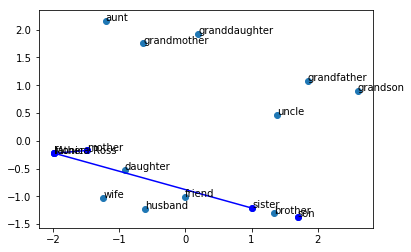

In [16]:
import matplotlib.pyplot as plt

plt.scatter(result[:, 0], result[:, 1])
plt.plot(result[0:1, 0], result[0:1, 1])
x=result[1:-10, 0]
y=result[1:-10, 1]

for i in range(0, len(x), 2):
    plt.plot(x[i:i+2], y[i:i+2], 'bo-')

words = ['brother', 'sister', 'Monica-Ross', 'mother', 'father', 'son', 'daughter', 'husband', 
         'wife', 'grandson', 'granddaughter', 'grandmother', 'grandfather', 'friend', 'uncle', 'aunt']

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

#plt.savefig('wordembeddings_flair.png', format='png')
plt.show()

## Using TSNE

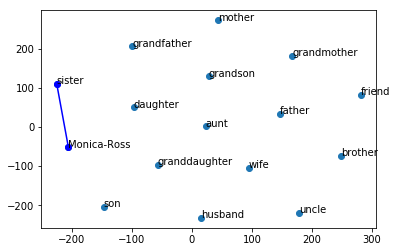

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
result = tsne.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
#plt.plot(result[0:1, 0], result[0:1, 1])
x=result[1:-10, 0]
y=result[1:-10, 1]

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    
# draw connection between two vectors
#for i in range(0, len(x), 2):
#    plt.plot(x[i:i+2], y[i:i+2], 'bo-')
i = 0

plt.plot(x[i:i+2], y[i:i+2], 'bo-')   
plt.savefig('embeddings_flair_tsne.png', dpi=200, format='png')

plt.show() 